1. Run IMDB
- Experiment with one and three hidden layers
- Experiment with more or fewer hidden units - 32 units, 64 units etc.
- Investigate replacing the `binary_crossentropy` loss function with `mse`
- Experiment with replacing `relu` with `tanh` activations
- Investigate the effect of different learning rates
- Take your best network and train on all the training data for the optimal epochs. Evaluate on the test set

In [1]:
# IMDB

from tensorflow.keras.datasets import imdb
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# load
((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# build
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 12s 387ms/step - loss: 0.5226 - accuracy: 0.7884 - val_loss: 0.3915 - val_accuracy: 0.8643
Epoch 2/20
30/30 [==============================] - 9s 317ms/step - loss: 0.3091 - accuracy: 0.9003 - val_loss: 0.3052 - val_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 12s 417ms/step - loss: 0.2240 - accuracy: 0.9253 - val_loss: 0.2779 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 12s 407ms/step - loss: 0.1801 - accuracy: 0.9404 - val_loss: 0.2739 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 11s 367ms/step - loss: 0.1464 - accuracy: 0.9529 - val_loss: 0.2783 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 10s 327ms/step - loss: 0.1217 - accuracy: 0.9626 - val_loss: 0.3154 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 9s 297ms/step - loss: 0.1026 - accuracy: 0.9683 - val_loss: 0.3123 - val_accuracy: 0.8841
E

In [2]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [3]:
history_dict['loss']

[0.5225852727890015,
 0.309116393327713,
 0.22403830289840698,
 0.18009038269519806,
 0.14644011855125427,
 0.12174931913614273,
 0.1025865375995636,
 0.08571416884660721,
 0.07273387908935547,
 0.059614796191453934,
 0.04962066188454628,
 0.03984822705388069,
 0.0323394276201725,
 0.025888923555612564,
 0.022947639226913452,
 0.014671890996396542,
 0.012445741333067417,
 0.012816728092730045,
 0.006699089426547289,
 0.009286549873650074]

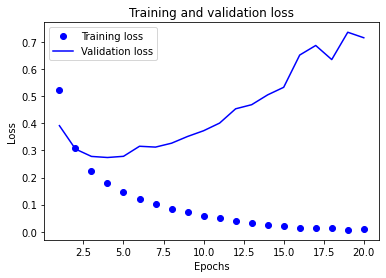

In [4]:
import matplotlib.pyplot as plt
    
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [5]:
history_dict['accuracy']

[0.7883999943733215,
 0.9003333449363708,
 0.925266683101654,
 0.9404000043869019,
 0.9528666734695435,
 0.9625999927520752,
 0.9683333039283752,
 0.9745333194732666,
 0.9805999994277954,
 0.9846000075340271,
 0.987666666507721,
 0.9904666543006897,
 0.9939333200454712,
 0.9951333403587341,
 0.9961333274841309,
 0.998533308506012,
 0.9990000128746033,
 0.997866690158844,
 0.9997333288192749,
 0.9983333349227905]

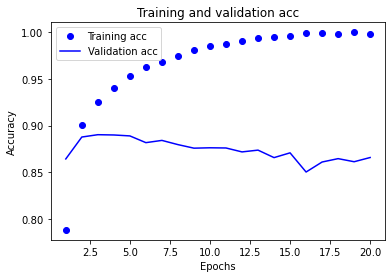

In [6]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
    
epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'
    
plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()